In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer

ModuleNotFoundError: No module named 'pandas'

In [59]:
tweets = pd.read_csv(r'C:/Users/hp/Desktop/abeselomTwitter/Twitter-Data-Analysis/data/economic_clean_data.csv')
tweets.head(3)

,Unnamed: 0,created_at,source,original_text,clean_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,38,Fri Apr 22 22:17:05 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @NorthstarCharts: The 10-year yield is tell...,The 10-year yield is telling us that there's a...,0.16,0.540,en,0.0,43.0,davideiacovozzi,18,55,NaN,"[{'text': 'gold', 'indices': [116, 121]}, {'te...",NorthstarCharts,NaN
1,39,Fri Apr 22 13:44:53 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @MichaelAArouet: German 10y mortgage rate w...,"German 10y mortgage rate went from 0,8% to 2,5...",0.15,0.175,en,0.0,32.0,davideiacovozzi,18,55,NaN,[],MichaelAArouet,NaN
2,41,Fri Apr 22 06:10:34 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @goldseek: When? https://t.co/kO2FfHKaZg,When? https://t.co/kO2FfHKaZg,0.00,0.000,en,0.0,26.0,davideiacovozzi,18,55,False,[],goldseek,NaN


In [60]:
Clean_Tweet = tweets[['clean_text','polarity']]
Clean_Tweet['clean_text'] =  tweets['clean_text'].to_list()
Clean_Tweet['polarity'] =  tweets['polarity'].to_list()
Clean_Tweet.dropna() # droping null values
Clean_Tweet.drop(Clean_Tweet.loc[Clean_Tweet['polarity']=="polarity"].index, inplace=True)
Clean_Tweet['polarity'] = pd.to_numeric(Clean_Tweet['polarity'])

<ipython-input-60-38aaa9997671>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_Tweet['clean_text'] =  tweets['clean_text'].to_list()
<ipython-input-60-38aaa9997671>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_Tweet['polarity'] =  tweets['polarity'].to_list()
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [61]:
Clean_Tweet.head()

,clean_text,polarity
0,The 10-year yield is telling us that there's a...,0.16
1,"German 10y mortgage rate went from 0,8% to 2,5...",0.15
2,When? https://t.co/kO2FfHKaZg,0.00
3,The 30-year mortgage rate in the US rises to 5...,0.00
4,Rates rise until something breaks … is anythin...,-0.40


In [62]:
def text_category (p):
  if p > 0:
    return 'positive'
  elif p < 0:
    return 'negative'
  else:
    return 'neutral'

In [63]:
Clean_Tweet['score'] = Clean_Tweet.polarity.apply(text_category)

<ipython-input-63-dd86ced7fd45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Clean_Tweet['score'] = Clean_Tweet.polarity.apply(text_category)


In [64]:
Clean_Tweet.head()

,clean_text,polarity,score
0,The 10-year yield is telling us that there's a...,0.16,positive
1,"German 10y mortgage rate went from 0,8% to 2,5...",0.15,positive
2,When? https://t.co/kO2FfHKaZg,0.00,neutral
3,The 30-year mortgage rate in the US rises to 5...,0.00,neutral
4,Rates rise until something breaks … is anythin...,-0.40,negative


In [65]:
labels = ['neutral', 'positive', 'negative']
positive = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
negative = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])
neutral = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])

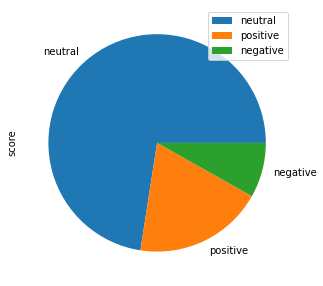

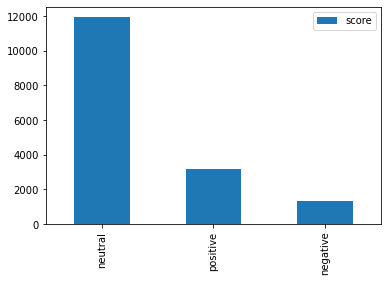

In [66]:
plotdf = pd.DataFrame({'labels':labels, 'score':[neutral,positive,negative]},index=['neutral', 'positive', 'negative'])
plotdf.plot.pie(y='score', figsize=(5, 5))
ax = plotdf.plot.bar(y='score', rot=90)

In [67]:
# Clean_Tweet = Clean_Tweet.drop(Clean_Tweet[Clean_Tweet.score == 'neutral'].index)
Clean_Tweet.drop(Clean_Tweet.loc[Clean_Tweet['score']=="neutral"].index, inplace=True)
Clean_Tweet.reset_index(drop=True, inplace=True)
Clean_Tweet.dropna()
Clean_Tweet.tail()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,clean_text,polarity,score
4516,"PSSg Gedson Castañeros, Mobile Patroller of Oz...",0.10,positive
4517,Free yourself from writing and maintaining tha...,0.40,positive
4518,Best wishes &amp; heartfelt congratulations to...,0.50,positive
4519,Thank you @BajpayeeManoj for this beautiful me...,0.85,positive
4520,1. Peace Yatra by Late Sunil Dutt from Mumbai ...,-0.30,negative


In [68]:
scoremap = pd.Series([1 if score == 'positive' else 0 for score in Clean_Tweet['score']])
Clean_Tweet = pd.concat([Clean_Tweet, scoremap.rename("scoremap")], axis=1)
Clean_Tweet['scoremap'] = scoremap
Clean_Tweet

,clean_text,polarity,score,scoremap
0,The 10-year yield is telling us that there's a...,0.16,positive,1
1,"German 10y mortgage rate went from 0,8% to 2,5...",0.15,positive,1
2,Rates rise until something breaks … is anythin...,-0.40,negative,0
3,Buying opportunities like this only occur ever...,-0.10,negative,0
4,Welcome to September 2018.\n\nBond markets tes...,0.40,positive,1
...,...,...,...,...
4516,"PSSg Gedson Castañeros, Mobile Patroller of Oz...",0.10,positive,1
4517,Free yourself from writing and maintaining tha...,0.40,positive,1
4518,Best wishes &amp; heartfelt congratulations to...,0.50,positive,1
4519,Thank you @BajpayeeManoj for this beautiful me...,0.85,positive,1


In [92]:
X, y = Clean_Tweet['clean_text'], Clean_Tweet['scoremap']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,shuffle=True, random_state=42)
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

3390
1131
3390
1131


In [105]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=9000, tol=1e-2))

In [106]:
count_vect = CountVectorizer(3,3)
X_train = X_train.replace(np.nan, '', regex=True)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts = X_train_counts.toarray()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass input=3, encoding=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [111]:
clf.fit(X_train_counts, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=9000, tol=0.01))])

In [109]:
X_test = X_test.replace(np.nan, '', regex=True)
X_test_counts = count_vect.transform(X_test)
X_test_counts = X_test_counts.toarray()
prediction = clf.predict(X_test_counts)

In [110]:
accuracy_score(y_test, prediction)

0.7541998231653404

In [128]:
# Sentiment Analysis

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [123]:
train, test = train_test_split(Clean_Tweet,test_size = 0.2, shuffle=True, stratify=Clean_Tweet.score,random_state=42)
train_pos = train[ train['score'] == 'positive']
train_pos = train_pos['clean_text']
train_neg = train[ train['score'] == 'negative']
train_neg = train_neg['clean_text']


In [124]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

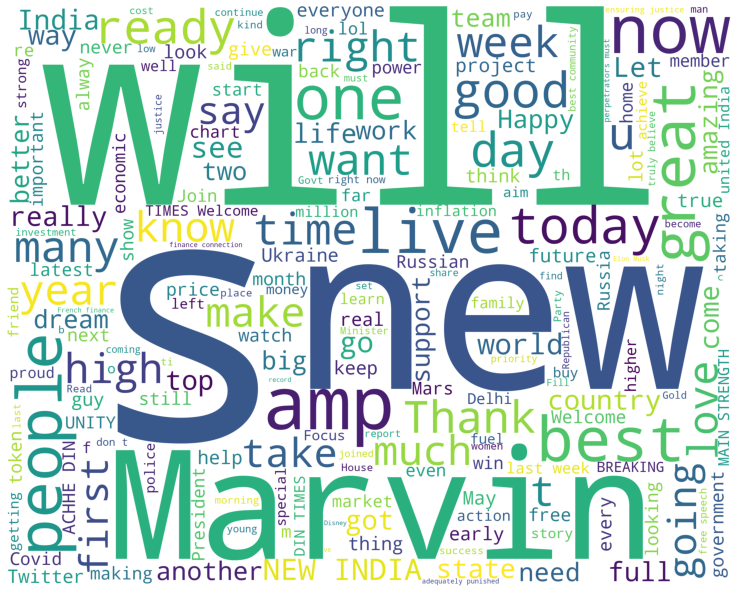

In [126]:
wordcloud_draw(train_pos,'white')

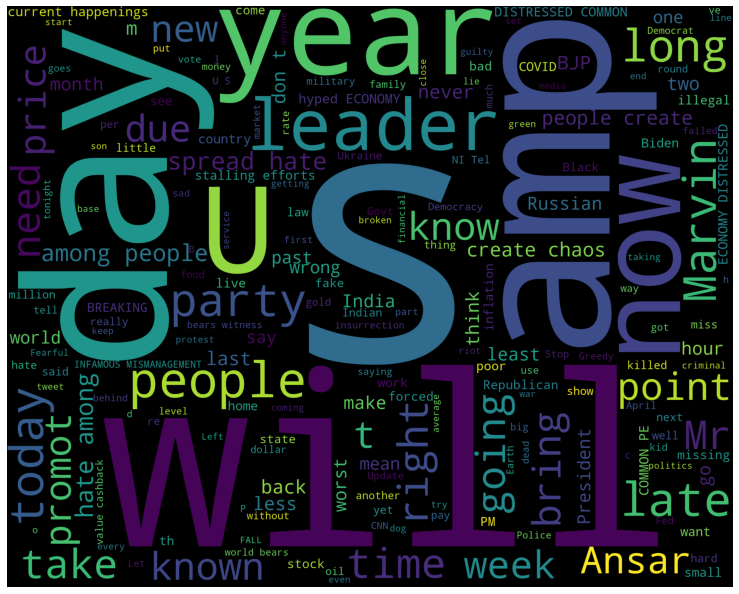

In [127]:
wordcloud_draw(train_neg,'black')

In [ ]:
nltk.download("stopwords")
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.clean_text.split() if len(e) >= 3]
    words_cleaned = [
        word
        for word in words_filtered
        if "http" not in word
        and not word.startswith("@")
        and not word.startswith("#")
        and word != "RT"
    ]
    words_without_stopwords = [
        word for word in words_cleaned if not word in stopwords_set
    ]
    tweets.append((words_without_stopwords, row.score))

test_pos = test[test["score"] == "positive"]
test_pos = test_pos["clean_text"]
test_neg = test[test["score"] == "negative"]
test_neg = test_neg["clean_text"]


In [1]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all


def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features


w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features["contains(%s)" % word] = word in document_words
    return features


NameError: name 'tweets' is not defined